调参常用方法：
* grid search
* random search
* 遗传算法
* Bayesian optimization

Hyperopt 就是贝叶斯优化的一种实现。

## 目标函数

In [1]:
from hyperopt import fmin, tpe, hp

In [2]:
best = fmin(
    fn = lambda x:x,
    space=hp.uniform('x', 0, 1),
    algo=tpe.suggest,
    max_evals=100)

print best

{'x': 0.0002064169144039103}


fmin函数的几个参数：
* fn: 我们要最小化的目标函数
* space: 参数的搜索空间
* algo: 搜索算法, {tpe.suggest, hyperopt.random}
* max_evals: 

In [3]:
best = fmin(
    fn=lambda x: (x-1)**2,
    space=hp.uniform('x', -2, 2),
    algo=tpe.suggest,
    max_evals=100)

In [4]:
print best

{'x': 0.9951185989659813}


# 搜索空间

hyperopt 含有多个函数来确定参数的范围:
* hp.uniform(label, left, right),
* hp.choice(label, options), options是list或tuple
* hp.normal(label, mu, sigma),
* hp.lognormal()
* hp.quniform()

In [5]:
import hyperopt.pyll.stochastic

In [6]:
space = {
    'x': hp.uniform('x', 0, 1),
    'y': hp.normal('y', 0, 1),
    'name': hp.choice('name', ['alice', 'bob'])
}

In [7]:
print hyperopt.pyll.stochastic.sample(space)

{'y': -0.6533323366681183, 'x': 0.34297983176007085, 'name': 'alice'}


# 使用Trials捕获 内部信息 

如果仅仅把hyperopt当做一个黑盒，只输出最优参数，心里总是没底，可以用Trials对象来捕获更多的计算信息。

In [9]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [10]:
fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x ** 2
    return {'loss': val, 'status': STATUS_OK}

trials = Trials()
best = fmin(
    fn=f,
    space=fspace,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials)

In [11]:
print 'best:', best

best: {'x': -0.010927428040697684}


In [12]:
print 'trials'

trials


In [13]:
for trial in trials.trials[:2]:
    print trial

{'refresh_time': datetime.datetime(2016, 8, 15, 8, 11, 54, 14000), 'book_time': datetime.datetime(2016, 8, 15, 8, 11, 54, 13000), 'misc': {'tid': 0, 'idxs': {'x': [0]}, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'vals': {'x': [4.4705981792868315]}, 'workdir': None}, 'state': 2, 'tid': 0, 'exp_key': None, 'version': 0, 'result': {'status': 'ok', 'loss': 19.98624808064273}, 'owner': None, 'spec': None}
{'refresh_time': datetime.datetime(2016, 8, 15, 8, 11, 54, 17000), 'book_time': datetime.datetime(2016, 8, 15, 8, 11, 54, 17000), 'misc': {'tid': 1, 'idxs': {'x': [1]}, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'vals': {'x': [-4.06515733953707]}, 'workdir': None}, 'state': 2, 'tid': 1, 'exp_key': None, 'version': 0, 'result': {'status': 'ok', 'loss': 16.525504195192106}, 'owner': None, 'spec': None}


# 一个例子

In [17]:
from sklearn import datasets

In [18]:
iris =  datasets.load_iris()

In [19]:
print iris.feature_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
print iris.target_names

['setosa' 'versicolor' 'virginica']


In [22]:
### print iris.DESCR

In [39]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
sns.set(style="whitegrid", palette="husl")

In [41]:
iris = sns.load_dataset("iris")
print iris.head()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [42]:
iris = pd.melt(iris, "species", var_name="measurement")
print iris.head()

  species   measurement  value
0  setosa  sepal_length    5.1
1  setosa  sepal_length    4.9
2  setosa  sepal_length    4.7
3  setosa  sepal_length    4.6
4  setosa  sepal_length    5.0


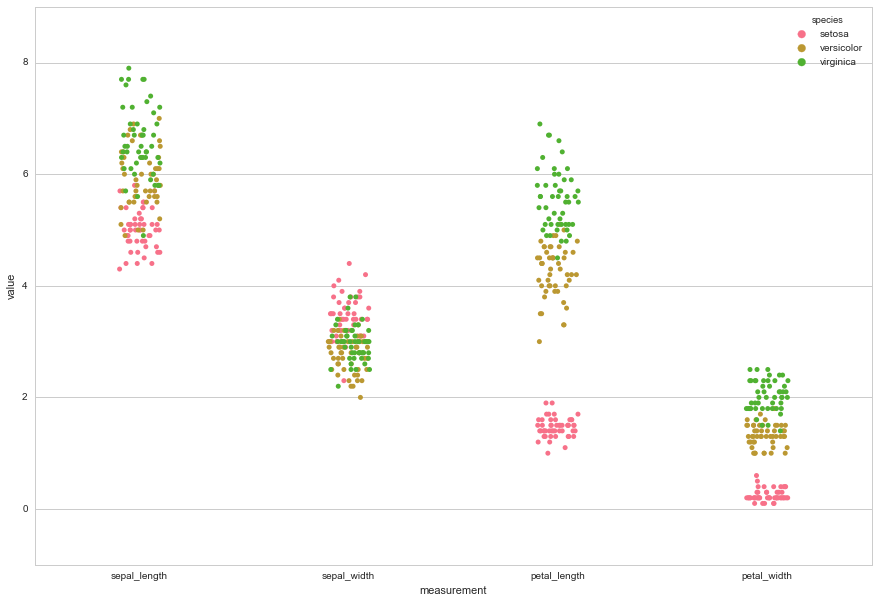

In [43]:
f, ax = plt.subplots(1, figsize=(15, 10))
sns.stripplot(x="measurement", y="value", hue="species", data=iris, jitter=True, edgecolor="white", ax=ax)

## kNN

In [46]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [47]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X, y).mean()

space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,100))
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)

In [48]:
print 'best:', best

best: {'n_neighbors': 4}
